In [568]:
#自動リロード
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from scoring import ig_scoring

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [569]:
res_dir="res/1020ig_plus_oa/*.csv"
path_list=glob.glob(res_dir)[::-1]
#path_list=sorted(path_list)

cond_list=[]
for path in path_list:
    name=path
    rem_list=res_dir.split("/")
    rem_list.extend([
            "/",
            ".csv",
    ])
    for n in rem_list:
        name=name.replace(n,"")
    


    cond_list.append(name)
len(cond_list)

269

In [570]:
path_dict={c:path for c,path in zip(cond_list,path_list)}

df=None

for key,path in path_dict.items():
    temp_df=pd.read_csv(path)
    temp_df["condition"]=key

    if df is None:
        df=temp_df
    else:
        #結合
        df=pd.concat((df,temp_df))

cols=["Number of data","Epoch","lr"]
df[cols]=df["condition"].str.split("_",expand=True)

In [571]:
score_list=[]
for record in df.to_dict(orient="records"):
    record["problem"]=record["problem"].replace("You are a great scientist. Answer the following question:\n[Question] ","")
    record["problem"]=record["problem"].replace("\n[Answer]","").strip()
    score_list.append(ig_scoring(record))

df["score"]=score_list

In [572]:

cols1=["Number of data","Epoch","lr","score"]
cols2=["Number of data","Epoch","lr"]

mean_df=df[cols1].groupby(cols2)
mean_df=mean_df.mean().reset_index()
mean_df["Epoch"]=mean_df["Epoch"].astype(int)
mean_df["Number of data"]=mean_df["Number of data"].astype(int)
mean_df[:3]

,Number of data,Epoch,lr,score
0,103,1,0.0001,0.14
1,103,11,0.0001,0.14
2,103,2,0.0001,0.14


In [573]:
mean_df=mean_df.sort_values(["Number of data","Epoch"],ascending=False)

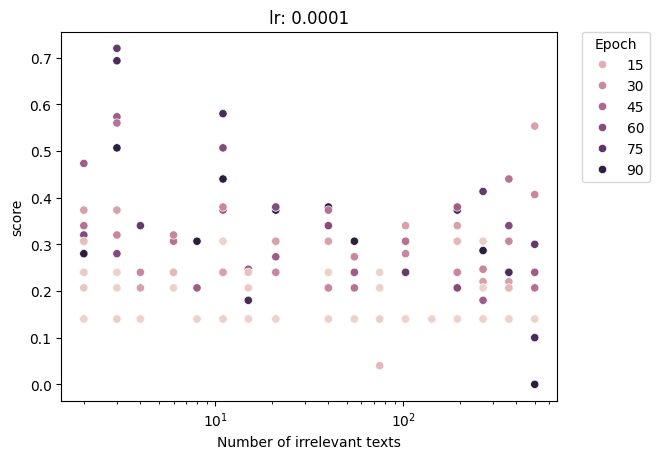

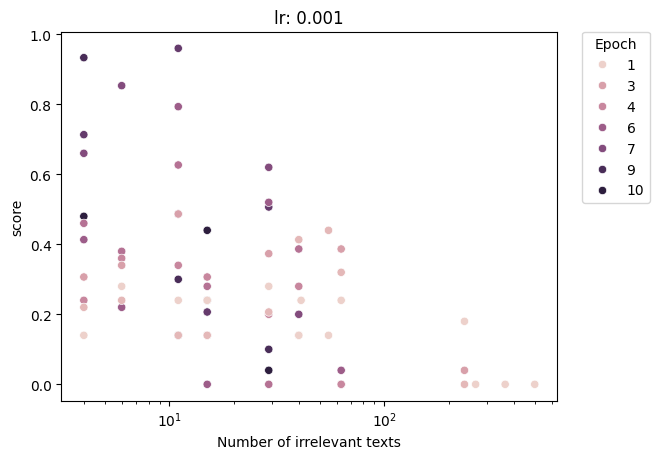

In [574]:
lr_list=mean_df["lr"].unique()

for lr in lr_list:
  sel_df=mean_df[mean_df["lr"]==lr]
  plt.figure()
  sns.scatterplot(data=sel_df,
                  hue="Epoch",
                  y="score",
                  x="Number of data"
                  )
  # hueに基づいて線をプロット
  """
  sns.lineplot(data=sel_df,
                x="Number of data",
                y="score",
                hue="Epoch", 
                legend=False
                )
  """
  plt.xscale("log")
  plt.xlabel("Number of irrelevant texts")
  plt.title(f"lr: {lr}")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10,title="Epoch")